# Taco Delivery Prediction

## 1. Introduction
### 1.1. Project Background
    In today's fast-paced food delivery landscape, ensuring quick and efficient service has become crucial for customer satisfaction and business success. One of the most critical factors influencing user experience is the delivery time. For restaurants and delivery services, the ability to predict how long an order will take to reach the customer can improve transparency, and reduce customer complaints.
### 1.2. Project Objective
    This project aims to predict the delivery duration (in minutes) of taco orders using machine learning techniques. We'll compare the performance of various regression models and determine which one provides the most accurate predictions
### 1.3. Dataset
    The dataset is titled "🌮 Taco Sales Dataset (2024–2025)" and was taken from Kaggle. It contains 1000 records of synthetic taco delivery orders generated between January 1, 2024 and May 25, 2025. It is designed to simulate real-world food delivery data. 
    
    Source: https://www.kaggle.com/datasets/atharvasoundankar/taco-sales-dataset-20242025
### 1.4. Metrics
    In predicting taco delivery times, it is essential to accurately measure how close the model’s predictions are to the actual delivery durations. To evaluate this, we use three widely accepted regression metrics: Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE).

    - Mean Absolute Error (MAE) 
     MAE calculates the average absolute difference between the predicted and actual delivery times. This metric provides a clear interpretation: on average, how many minutes off are our predictions? Since MAE treats all errors equally, it offers a straightforward measure of overall prediction accuracy in units that are easy to understand (minutes).

    - Mean Squared Error (MSE)
     MSE squares the errors before averaging, which means it penalizes larger errors more than smaller ones. This characteristic is important in delivery time prediction because large errors (e.g., severely underestimating or overestimating delivery duration) can negatively affect customer satisfaction and operational planning. By emphasizing these larger errors, MSE helps highlight models that minimize such critical mistakes.

    - Root Mean Squared Error (RMSE)
        RMSE is the square root of MSE, bringing the error metric back to the same scale as delivery time (minutes). It balances sensitivity to large errors with interpretability, making it easier to understand the typical size of prediction errors. RMSE is often preferred in practical applications since it directly reflects the average magnitude of prediction deviations.

    Using these three metrics together allows a comprehensive evaluation of our models. While MAE gives an intuitive sense of average error, MSE and RMSE focus more on larger deviations that could cause significant issues in delivery operations. This combined approach ensures that the chosen model not only predicts well on average but also avoids extreme errors that can disrupt service quality.

    

## 2. Import and Data Loading

### 2.1. Imports
    Before beginning our analysis, we import the necessary Python libraries that support data manipulation, visualization, and machine learning.

In [297]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor

### 2.2. Reading the Data
    Using pandas, we will read the data and store it in a dataframe.

In [298]:
df = pd.read_csv('data/taco_sales_data.csv')

In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Order ID                 1000 non-null   int64  
 1   Restaurant Name          1000 non-null   object 
 2   Location                 1000 non-null   object 
 3   Order Time               1000 non-null   object 
 4   Delivery Time            1000 non-null   object 
 5   Delivery Duration (min)  1000 non-null   int64  
 6   Taco Size                1000 non-null   object 
 7   Taco Type                1000 non-null   object 
 8   Toppings Count           1000 non-null   int64  
 9   Distance (km)            1000 non-null   float64
 10  Price ($)                1000 non-null   float64
 11  Tip ($)                  1000 non-null   float64
 12  Weekend Order            1000 non-null   bool   
dtypes: bool(1), float64(3), int64(3), object(6)
memory usage: 94.9+ KB


In [300]:
df.head()

,Order ID,Restaurant Name,Location,Order Time,Delivery Time,Delivery Duration (min),Taco Size,Taco Type,Toppings Count,Distance (km),Price ($),Tip ($),Weekend Order
0,770487,El Taco Loco,New York,01-08-2024 14:55,01-08-2024 15:36,41,Regular,Chicken Taco,5,3.01,9.25,2.22,False
1,671858,El Taco Loco,San Antonio,23-11-2024 17:11,23-11-2024 17:25,14,Regular,Beef Taco,1,6.20,4.25,3.01,True
2,688508,Taco Haven,Austin,21-11-2024 20:24,21-11-2024 21:02,38,Large,Pork Taco,2,20.33,7.00,0.02,False
3,944962,Spicy Taco House,Dallas,21-09-2024 06:43,21-09-2024 07:28,45,Regular,Chicken Taco,2,3.00,5.50,1.90,True
4,476417,Casa del Taco,San Antonio,24-07-2024 11:01,24-07-2024 11:16,15,Large,Pork Taco,0,24.34,4.50,1.14,False


## 3. Exploratory Data Analysis

### 3.1. Date and Time Feature Extraction
    To better analyze patterns and train predictive models, we will break down timestamp fields into more granular components. 

In [301]:
dt_parsed = pd.to_datetime(df['Delivery Time'], format='%d-%m-%Y %H:%M')

df['Delivery Date'] = dt_parsed.dt.date
df['Delivery Time'] = dt_parsed.dt.strftime('%H:%M')
df['Delivery Weekday'] = dt_parsed.dt.day_name()

df['Order Date'] = dt_parsed.dt.date
df['Order Time'] = dt_parsed.dt.strftime('%H:%M')


In [302]:
df.head()

,Order ID,Restaurant Name,Location,Order Time,Delivery Time,Delivery Duration (min),Taco Size,Taco Type,Toppings Count,Distance (km),Price ($),Tip ($),Weekend Order,Delivery Date,Delivery Weekday,Order Date
0,770487,El Taco Loco,New York,15:36,15:36,41,Regular,Chicken Taco,5,3.01,9.25,2.22,False,2024-08-01,Thursday,2024-08-01
1,671858,El Taco Loco,San Antonio,17:25,17:25,14,Regular,Beef Taco,1,6.20,4.25,3.01,True,2024-11-23,Saturday,2024-11-23
2,688508,Taco Haven,Austin,21:02,21:02,38,Large,Pork Taco,2,20.33,7.00,0.02,False,2024-11-21,Thursday,2024-11-21
3,944962,Spicy Taco House,Dallas,07:28,07:28,45,Regular,Chicken Taco,2,3.00,5.50,1.90,True,2024-09-21,Saturday,2024-09-21
4,476417,Casa del Taco,San Antonio,11:16,11:16,15,Large,Pork Taco,0,24.34,4.50,1.14,False,2024-07-24,Wednesday,2024-07-24


The numbers of unique values for the columns 'Restaurant Name', and 'Location' are low, which is important for later (One-Hot Encoding). 

In [303]:
print(df['Restaurant Name'].nunique())
print(df['Location'].nunique())

10
10


### 3.2. Distribution of Delivery Duration
    The histogram below shows the frequency of different delivery durations across the dataset, with a kernel density estimate curve to highlight the shape of the distribution. The delivery times range approximately from 10 to 90 minutes and exhibit a multimodial pattern, which indicates that there may be distinct groups or clusters of deliveries based on different factors. The distribution appears relatively balanced, with no significant skewness, and no extreme outliers, suggesting a stable delivery process.

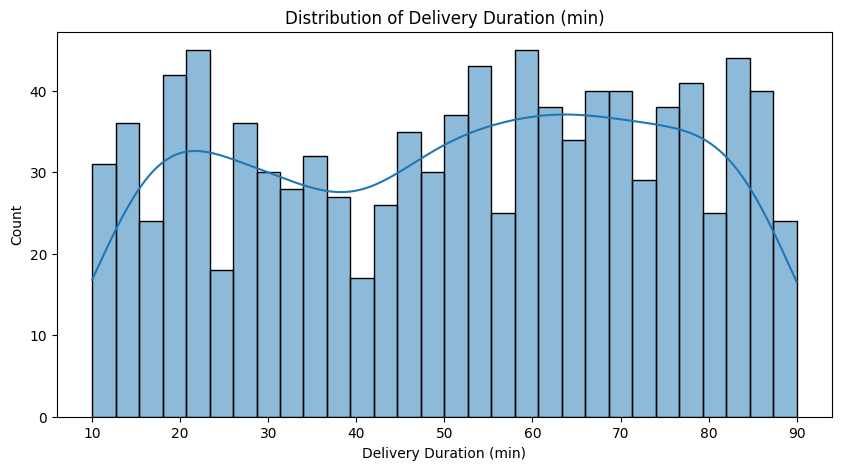

In [304]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Delivery Duration (min)'], bins=30, kde=True)
plt.title("Distribution of Delivery Duration (min)")
plt.xlabel("Delivery Duration (min)")
plt.ylabel("Count")
plt.show()


### 3.3. Correlation Analysis of Numerical Features
    The heatmap below illustrates the pairwise Pearson correlation coefficients among selected numerical variables in the dataset. This analysis helps identify the strength and direction of linear relationships between variables. Delivery duration exhibits a moderate positive correlation with distance, which is to be expected (longer distances typically require more time for delivery). Other features demonstrate weaker correlations with delivery time, suggesting those attributes may not directly influence delivery efficiency. 

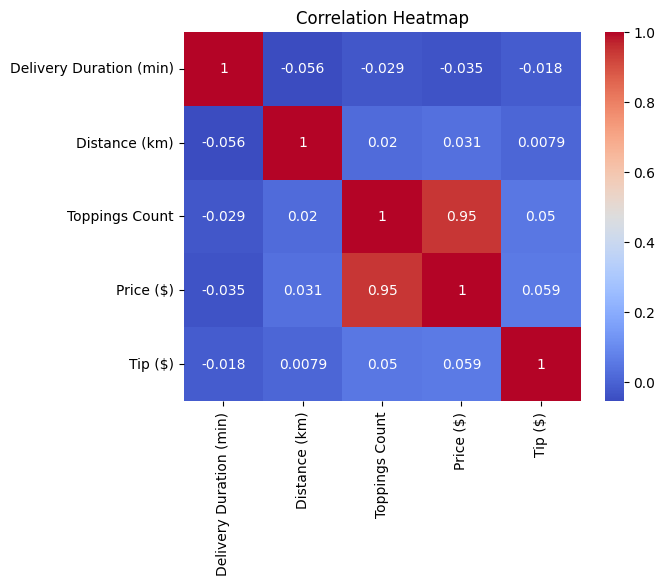

In [305]:
numerical_cols = ['Delivery Duration (min)', 'Distance (km)', 'Toppings Count', 'Price ($)', 'Tip ($)']
corr = df[numerical_cols].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

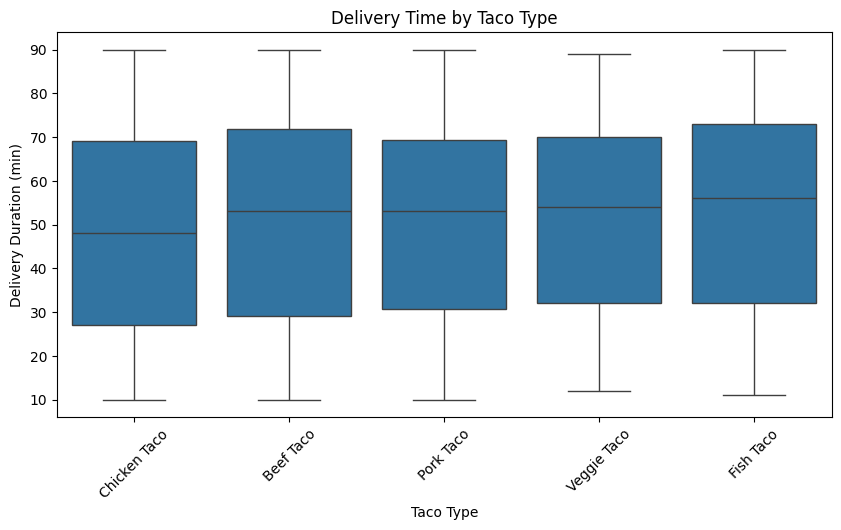

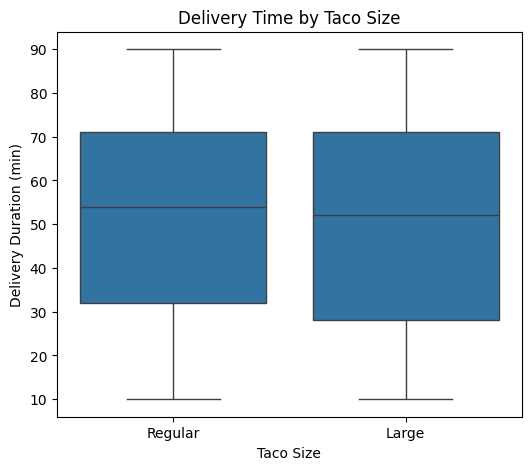

In [306]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Taco Type', y='Delivery Duration (min)', data=df)
plt.xticks(rotation=45)
plt.title("Delivery Time by Taco Type")
plt.show()

# Taco Size
plt.figure(figsize=(6, 5))
sns.boxplot(x='Taco Size', y='Delivery Duration (min)', data=df)
plt.title("Delivery Time by Taco Size")
plt.show()


In [307]:
df.head()

,Order ID,Restaurant Name,Location,Order Time,Delivery Time,Delivery Duration (min),Taco Size,Taco Type,Toppings Count,Distance (km),Price ($),Tip ($),Weekend Order,Delivery Date,Delivery Weekday,Order Date
0,770487,El Taco Loco,New York,15:36,15:36,41,Regular,Chicken Taco,5,3.01,9.25,2.22,False,2024-08-01,Thursday,2024-08-01
1,671858,El Taco Loco,San Antonio,17:25,17:25,14,Regular,Beef Taco,1,6.20,4.25,3.01,True,2024-11-23,Saturday,2024-11-23
2,688508,Taco Haven,Austin,21:02,21:02,38,Large,Pork Taco,2,20.33,7.00,0.02,False,2024-11-21,Thursday,2024-11-21
3,944962,Spicy Taco House,Dallas,07:28,07:28,45,Regular,Chicken Taco,2,3.00,5.50,1.90,True,2024-09-21,Saturday,2024-09-21
4,476417,Casa del Taco,San Antonio,11:16,11:16,15,Large,Pork Taco,0,24.34,4.50,1.14,False,2024-07-24,Wednesday,2024-07-24


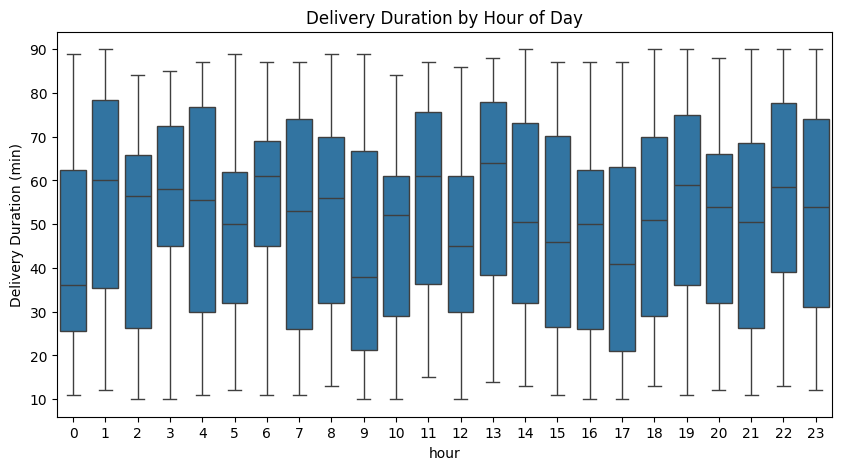

In [308]:
df['Order Time'] = pd.to_datetime(df['Order Time'], format='%H:%M')
df['hour'] = df['Order Time'].dt.hour

plt.figure(figsize=(10, 5))
sns.boxplot(x='hour', y='Delivery Duration (min)', data=df)
plt.title("Delivery Duration by Hour of Day")
plt.show()


## 4. Data Preprocessing & Feature Engineering

### 4.1. Data Preprocessing
    To prepare the dataset for machine learning, several data preprocessing steps were applied. 

The categorical variable "Delivery Weekday" was mapped to numerical values using the dictionary found below, enabling the model to recognize temporal ordering, where Monday is represented as 0 and Sunday is represented as 6. 

In [309]:
weekday_map = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}
df['dayofweek'] = df['Delivery Weekday'].map(weekday_map)

Irrelevant and redundant columns were removed because they are not essential for delivery duration prediction.

In [310]:
df = df.drop(columns=['Order ID', 'Delivery Time', 'Order Time', 'Order Date', 'Delivery Date', 'Delivery Weekday', 'Tip ($)'])


### 4.2. Feature Engineering
One-Hot Encoding was performed on four (4) columns with categorical variables. Earlier, we counted the number of unique values for 'Restaurant Name' and 'Location', and both amounted to 10. With a low number, it is safe to use One-Hot Encoding. Linear Regression requires numerical inputs without implicit order, and Random Forest, Gradient Boosting, and XGBRegressor do better with it.

In [311]:
df_encoded = pd.get_dummies(df, columns=['Restaurant Name', 'Location', 'Taco Type', 'Taco Size'], drop_first=True)


We split the values between X (columns with values used to predict delivery time) and y ('Delivery Duration (min)' column).

In [312]:
X = df_encoded.drop(columns=['Delivery Duration (min)'])
y = df_encoded['Delivery Duration (min)']


Before running our dataset through the different algorithms, we shall check the different columns to see whether or not there are any issues.

In [313]:
df_encoded.head()

,Delivery Duration (min),Toppings Count,Distance (km),Price ($),Weekend Order,hour,dayofweek,Restaurant Name_El Taco Loco,Restaurant Name_Grande Tacos,Restaurant Name_La Vida Taco,...,Location_New York,Location_Phoenix,Location_San Antonio,Location_San Diego,Location_San Jose,Taco Type_Chicken Taco,Taco Type_Fish Taco,Taco Type_Pork Taco,Taco Type_Veggie Taco,Taco Size_Regular
0,41,5,3.01,9.25,False,15,3,True,False,False,...,True,False,False,False,False,True,False,False,False,True
1,14,1,6.20,4.25,True,17,5,True,False,False,...,False,False,True,False,False,False,False,False,False,True
2,38,2,20.33,7.00,False,21,3,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,45,2,3.00,5.50,True,7,5,False,False,False,...,False,False,False,False,False,True,False,False,False,True
4,15,0,24.34,4.50,False,11,2,False,False,False,...,False,False,True,False,False,False,False,True,False,False


We divide our features and target variable into training and testing subsets.

In [314]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)


## 5. Model Creation

### 5.1. Running the Models
    We implemented and evaluated four regression models (Linear Regression, Random Forest Regressor, Gradient Boosting Regressor, and XGBoost Regressor). Each model was trained on the subset of the data with a fixed random seed to ensure reproducibility. Following training, predictions were generated on the test subset, and model performance was assessed using three commonly used regression metrics. 

    The results indicate that the Random Forest model achieved the best predictive performance, demonstrating the lowest values across all three metrics, suggesting it captures the underlying patterns in the data more effectively than the other models. Linear Regression and Gradient Boosting models exhibited comparable performance, while XGBoost yielded the highest error metrics, indicating relatively lower accuracy on this specific dataset.

In [315]:
lr = LinearRegression()
rf = RandomForestRegressor(random_state=10) 
gb = GradientBoostingRegressor(random_state=10)  
xgb = XGBRegressor(random_state=10, verbosity=0)  


lr.fit(X_train, y_train)   
rf.fit(X_train, y_train)  
gb.fit(X_train, y_train)   
xgb.fit(X_train, y_train)  

y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_gb = gb.predict(X_test)
y_pred_xgb = xgb.predict(X_test)


results = []
for name, y_pred in [
    ("Linear Regression", y_pred_lr),
    ("Random Forest", y_pred_rf),
    ("Gradient Boosting", y_pred_gb),
    ("XGBoost", y_pred_xgb)
]:
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    results.append({
        "Model": name,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse
    })

results_df = pd.DataFrame(results)

print("Model performance on test set:")
print(results_df)

Model performance on test set:
               Model        MAE         MSE       RMSE
0  Linear Regression  22.052265  645.783374  25.412268
1      Random Forest  21.552350  618.671570  24.873109
2  Gradient Boosting  22.234223  656.882198  25.629713
3            XGBoost  23.504118  791.105831  28.126604


### 5.2. Viewing the Metrics
    Below are visualizations of the metrics of the results discussed above.

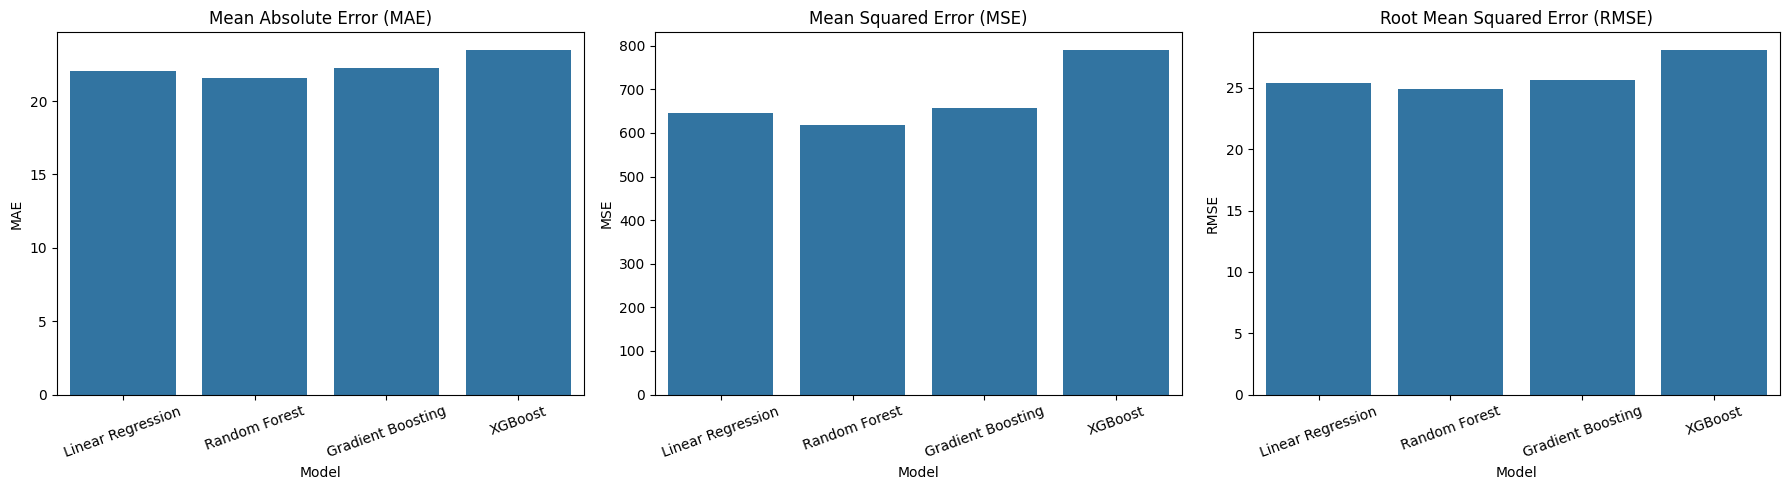

In [316]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

metrics = ['MAE', 'MSE', 'RMSE']
titles = ['Mean Absolute Error (MAE)', 'Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)']

for i, metric in enumerate(metrics):
    sns.barplot(x='Model', y=metric, data=results_df, ax=axes[i])
    axes[i].set_title(titles[i])
    axes[i].set_xlabel('Model')
    axes[i].set_ylabel(metric)
    axes[i].tick_params(axis='x', rotation=20)

plt.tight_layout()
plt.show()

### 5.3. Feature Importance
    After training the regression models, it is crucial to understand which features contributed most significantly to the predictions. To this end, we extracted and analyzed feature importance scores from each model. For the Linear Regression model, feature importance is represented by the absolute values of the learned coefficients, which indicate the strength of the linear relationship between each input variable and the target. In contrast, for the tree-based models—Random Forest, Gradient Boosting, and XGBoost—the models provide intrinsic feature importance scores. These scores quantify the relative contribution of each feature based on how much they reduce prediction error when used to split nodes during tree construction.

    The analysis of the top 10 features for each model revealed some interesting patterns. The Linear Regression model identified specific restaurant names, such as Taco Time Express and Spicy Taco House, and locations like Dallas and Chicago as having the strongest influence on the predicted delivery duration. Additionally, features like the weekend order indicator and taco types also showed notable importance, suggesting that these categorical variables have a measurable linear effect on delivery time.

    Meanwhile, the Random Forest and Gradient Boosting models, which capture nonlinear relationships and feature interactions, emphasized distance-related and temporal variables. Specifically, Distance (km) emerged as the most important feature, followed by hour of order and day of week, indicating that delivery distance and timing play key roles in predicting delivery duration in these models. Other relevant factors included price and the count of toppings, alongside some taco types and restaurant names, highlighting a combination of spatial, temporal, and categorical influences.

    The XGBoost model’s feature importance profile showed greater emphasis on certain restaurant names, including The Taco Stand and El Taco Loco, as well as popular taco types like Chicken Taco. Price and location features such as San Jose and New York were also significant, reflecting the model’s sensitivity to both geographic and product-related factors.

In [317]:
lr_importance = pd.Series(lr.coef_, index=X_train.columns).abs().sort_values(ascending=False)


rf_importance = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

gb_importance = pd.Series(gb.feature_importances_, index=X_train.columns).sort_values(ascending=False)

xgb_importance = pd.Series(xgb.feature_importances_, index=X_train.columns).sort_values(ascending=False)

print("Top 10 features for Linear Regression:")
print(lr_importance.head(10), '\n')

print("Top 10 features for Random Forest:")
print(rf_importance.head(10), '\n')

print("Top 10 features for Gradient Boosting:")
print(gb_importance.head(10), '\n')

print("Top 10 features for XGBoost:")
print(xgb_importance.head(10))

Top 10 features for Linear Regression:
Restaurant Name_Taco Time Express    5.819410
Location_Dallas                      5.138999
Restaurant Name_Spicy Taco House     5.016203
Restaurant Name_Grande Tacos         3.981925
Restaurant Name_Taco Haven           3.693641
Weekend Order                        3.209754
Restaurant Name_Urban Tacos          2.644490
Taco Type_Chicken Taco               2.523100
Location_Chicago                     2.423828
Location_San Jose                    2.286581
dtype: float64 

Top 10 features for Random Forest:
Distance (km)                        0.238120
hour                                 0.145353
dayofweek                            0.080813
Price ($)                            0.079773
Toppings Count                       0.051539
Taco Type_Chicken Taco               0.022370
Taco Type_Fish Taco                  0.020870
Restaurant Name_Taco Time Express    0.020453
Taco Type_Pork Taco                  0.018988
Taco Type_Veggie Taco              

## 6. Prototype

In [318]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Get the columns needed for input (excluding encoded columns)
base_features = [
    'Distance (km)', 'Toppings Count', 'Price ($)', 'Tip ($)', 'hour', 'dayofweek', 'is_weekend'
]

# Get unique values for categorical features from the original df
restaurant_names = df['Restaurant Name'].unique().tolist()
locations = df['Location'].unique().tolist()
taco_types = df['Taco Type'].unique().tolist()
taco_sizes = df['Taco Size'].unique().tolist()

# Widgets for user input
distance_widget = widgets.FloatText(description='Distance (km):')
toppings_widget = widgets.IntText(description='Toppings Count:')
price_widget = widgets.FloatText(description='Price ($):')
hour_widget = widgets.IntSlider(description='Hour', min=0, max=23, value=12)
dayofweek_widget = widgets.Dropdown(description='Day of Week', options=[
    ('Monday',0), ('Tuesday',1), ('Wednesday',2), ('Thursday',3), ('Friday',4), ('Saturday',5), ('Sunday',6)
])
is_weekend_widget = widgets.Dropdown(description='Weekend?', options=[('No',0), ('Yes',1)])

restaurant_widget = widgets.Dropdown(description='Restaurant', options=restaurant_names)
location_widget = widgets.Dropdown(description='Location', options=locations)
taco_type_widget = widgets.Dropdown(description='Taco Type', options=taco_types)
taco_size_widget = widgets.Dropdown(description='Taco Size', options=taco_sizes)

button = widgets.Button(description="Predict Delivery Time")

output = widgets.Output()

def on_button_clicked(b):
    with output:
        clear_output()
        # Build a single-row DataFrame for input
        input_dict = {
            'Distance (km)': [distance_widget.value],
            'Toppings Count': [toppings_widget.value],
            'Price ($)': [price_widget.value],
            'hour': [hour_widget.value],
            'dayofweek': [dayofweek_widget.value],
            'Restaurant Name': [restaurant_widget.value],
            'Location': [location_widget.value],
            'Taco Type': [taco_type_widget.value],
            'Taco Size': [taco_size_widget.value]
        }
        input_df = pd.DataFrame(input_dict)
        # One-hot encode to match training columns
        input_encoded = pd.get_dummies(input_df, columns=['Restaurant Name', 'Location', 'Taco Type', 'Taco Size'], drop_first=True)
        # Align columns with training data
        input_encoded = input_encoded.reindex(columns=X_train.columns, fill_value=0)
        # Predict with all models
        pred_lr = lr.predict(input_encoded)[0]
        pred_rf = rf.predict(input_encoded)[0]
        pred_gb = gb.predict(input_encoded)[0]
        pred_xgb = xgb.predict(input_encoded)[0]
        print(f"Predicted Delivery Duration (min):")
        print(f"  Linear Regression: {pred_lr:.2f}")
        print(f"  Random Forest:     {pred_rf:.2f}")
        print(f"  Gradient Boosting: {pred_gb:.2f}")
        print(f"  XGBoost:           {pred_xgb:.2f}")

button.on_click(on_button_clicked)

display(widgets.VBox([
    distance_widget, toppings_widget, price_widget,
    hour_widget, dayofweek_widget, is_weekend_widget,
    restaurant_widget, location_widget, taco_type_widget, taco_size_widget,
    button, output
]))